**Flight Data Analysis (IN3062)**
<p>The objective of this project/study was to describe a machine learning problem and apply artificial intelligence techniques to solve that problem.
The flight booking dataset was used (provided on Kaggle.com) which was obtained from the “Ease My Trip” website (by Kaggle). The dataset contains information about each flight such as airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class, duration, days_left, and price. The main hypothesis was "How does the 10 different features affect price?" 
The ‘Linear Regression’ and ‘Feed Forward Network’ were used to train the dataset and predict a continuous target variable (price). Performance of both techniques was compared. Linear Regression seemed to be a better choice for this problem than Feed-Forward-Network.</p>


Reading data from CSV using pandas

In [38]:
# importing data
import pandas as pd # for reading csv

df=pd.read_csv('Clean_Dataset.csv', na_values=['NA','?']) #ignore missing values
# Droping column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Most of the artificial intelligence techniques works on numerical data, but we have columns with textual data (i.e. source_city), we can convert this data to numeric data using ‘Label Encoder’.

In [39]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() #convert txt data to numeric
for col in df.columns:
    if df[col].dtype=='object': # no need to convert duration, days_left, and price columns
        df[col]=encoder.fit_transform(df[col])
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


Moreover, data can have outliers that may result in incorrect learning. We can remove outlier based on the z-score values. For example, we can discard data that outside of [-2,2] z-score. So we calculate z-score of price (which is the target), and remove rows from the data that has z-score of more than 2 and less than -2. 

In [40]:
#Removing Outliers
import numpy as np
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean())
                          >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)
shape_before = df.shape
remove_outliers(df,'price',2)
shape_after = df.shape

print(shape_before[0]-shape_after[0],"rows were removed")

10931 rows were removed


The data set has 11 features with the last one being the target (price)
We call the first 11 features the 'features' and the last feature 'price' 

In [41]:
#seperating features and target(price)
price = df['price'] # target
features = df.drop('price',axis=1) #data features
# features =df[['days_left','duration']] #data features

Scaling is important with neural networks, which work particularly well when the data is normally distributed. The standard scaler transforms the data so that it is normally distributed, and should allow the network to fit the data better. There are various scalar available. We tried: Min-Max Scalar, Z-Score Scalar and Standard Scalar.

In [42]:
#Scaling Data
# from sklearn.preprocessing import StandardScaler 

# sc = StandardScaler()
# sc.fit(features)
# features= sc.transform(features)
# features[0:3]

# from scipy.stats import zscore
# for col in features.columns:
#     features[col] = zscore(features[col])
# features[0:3]
feature_names = features.columns;
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
features=pd.DataFrame(mmscaler.fit_transform(features))
features.columns = feature_names;
features.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.8,0.902564,0.4,0.4,1.0,1.0,1.0,1.0,0.027347,0.0
1,0.8,0.889103,0.4,0.2,1.0,0.8,1.0,1.0,0.030612,0.0
2,0.0,0.777564,0.4,0.2,1.0,0.2,1.0,1.0,0.027347,0.0
3,1.0,0.999359,0.4,0.8,1.0,0.0,1.0,1.0,0.028980,0.0
4,1.0,0.992949,0.4,0.8,1.0,0.8,1.0,1.0,0.030612,0.0


Scaling is important with neural networks, which work particularly well when the data is normally distributed. The standard scaler transforms the data so that it is normally distributed, and should allow the network to fit the data better. There are various scalar available. We tried: Min-Max Scalar, Z-Score Scalar and Standard Scalar.

In [43]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
#spliting the data
xtrain,xtest,ytrain,ytest=train_test_split(features,price,test_size=0.8,random_state=42)
print("Sample in test set ",xtest.shape[0])
print("Sample in train set ",xtrain.shape[0])

Sample in test set  231378
Sample in train set  57844


We have created a simple feed forward network with two hidden layers and one ouput layer to predict the price

In [44]:
#Creating a Feed Forward Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

feedforward = Sequential()
feedforward.add(Dense(64, input_dim=xtrain.shape[1], activation='relu')) # Hidden 1
feedforward.add(Dense(64,activation='relu')) #Hidden 2
feedforward.add(Dense(1)) # Output
feedforward.compile(loss='mean_squared_error', optimizer='adam')
feedforward.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                704       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


We have trained the ff-net on training data

In [45]:
#Training the Feed-Forward Network
feedforward.fit(xtrain,ytrain,verbose=2,epochs=10) # tried to run for 600 iterations but no significant improvement

Epoch 1/10
1808/1808 - 3s - loss: 468132832.0000 - 3s/epoch - 2ms/step
Epoch 2/10
1808/1808 - 3s - loss: 153539472.0000 - 3s/epoch - 1ms/step
Epoch 3/10
1808/1808 - 3s - loss: 36211760.0000 - 3s/epoch - 1ms/step
Epoch 4/10
1808/1808 - 3s - loss: 27750782.0000 - 3s/epoch - 2ms/step
Epoch 5/10
1808/1808 - 3s - loss: 24967152.0000 - 3s/epoch - 2ms/step
Epoch 6/10
1808/1808 - 3s - loss: 23389530.0000 - 3s/epoch - 1ms/step
Epoch 7/10
1808/1808 - 3s - loss: 22567118.0000 - 3s/epoch - 1ms/step
Epoch 8/10
1808/1808 - 3s - loss: 22204658.0000 - 3s/epoch - 1ms/step
Epoch 9/10
1808/1808 - 3s - loss: 21930452.0000 - 3s/epoch - 1ms/step
Epoch 10/10
1808/1808 - 3s - loss: 21771770.0000 - 3s/epoch - 1ms/step


After Training, the trained ff-net was evaluated on test data and the performance measure was printed

In [46]:
#predicting the priced (from test data) by Neural Network
pred = feedforward.predict(xtest)
#Measuring the RMSE score
import numpy as np
from sklearn import metrics
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,ytest))
print(f"Final score (RMSE): {score}")


7231/7231 [==============================] - 8s 1ms/step
Final score (RMSE): 4668.076548422273


Linear regression was trained on the training data

In [47]:
#Creating and Training Linear Regression Model
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
linearReg.fit(xtrain,ytrain)  


LinearRegression()

Linear regression model was then tested and root mean square error was reported

Root Mean Squared Error: 5704.718714590392


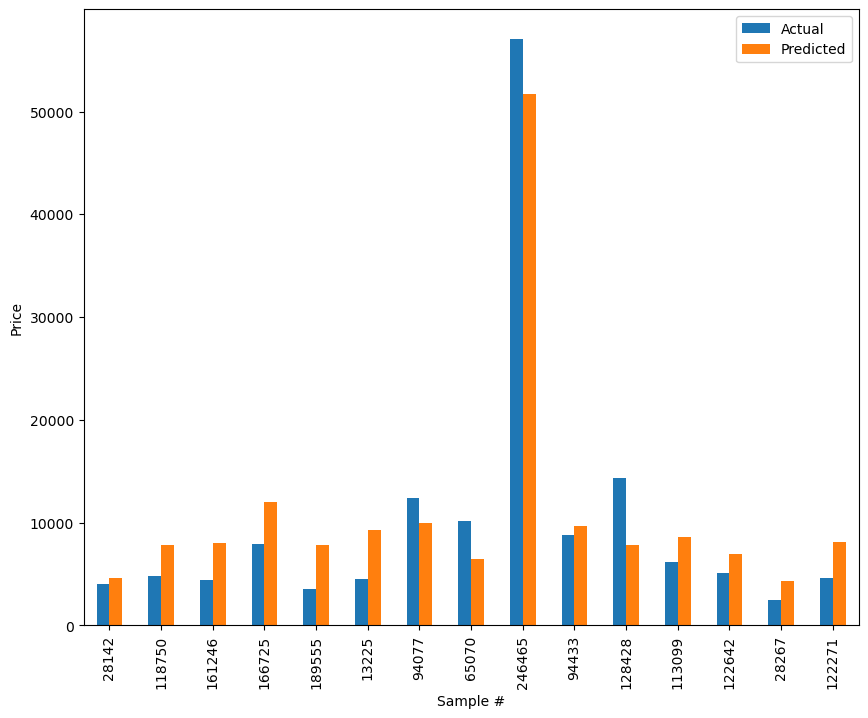

In [48]:
# Predict the model with test data using Linear Regression
ypred = linearReg.predict(xtest)
# Evaluation metrics for Regression analysis
df_compare = pd.DataFrame({'Actual': ytest, 'Predicted': ypred}).head(15)
df_compare.plot(kind='bar',figsize=(10,8),xlabel="Sample #",ylabel="Price")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred))) # Not good enough

Finally the Linear Regression and Feed Forward Network was evalued using K-Fold cross validation (5-fold to be specific)

In [49]:
#Kfold cross validation
from sklearn.model_selection import KFold
import numpy as np
from sklearn import metrics
# Measure RMSE error.  RMSE is common for regression.

kf = KFold(5,shuffle=True)

fold = 1
ftr = features.to_numpy()
prc = price.to_numpy()
# The data is split five ways, for each fold, the 
# Perceptron is trained, tested and evaluated for accuracy
for train_index, validate_index in kf.split(ftr,prc):
    y_test = prc[validate_index]
    feedforward.fit(ftr[train_index],prc[train_index],verbose=2,epochs=10)    
 
    linearReg.fit(ftr[train_index],prc[train_index])    
    
    print(f"Fold #{fold}, Training Size: {len(ftr[train_index])}, Validation Size: {len(ftr[validate_index])}")
    y_pred = feedforward.predict(ftr[validate_index])
    score = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
    print(f"Score (RMSE) FF-Network: {score}")

    y_pred = linearReg.predict(ftr[validate_index])
    score = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
    print(f"Score (RMSE) Linear Regression: {score}")

    fold += 1

Epoch 1/10
7231/7231 - 11s - loss: 21629000.0000 - 11s/epoch - 1ms/step
Epoch 2/10
7231/7231 - 10s - loss: 21331742.0000 - 10s/epoch - 1ms/step
Epoch 3/10
7231/7231 - 10s - loss: 21130826.0000 - 10s/epoch - 1ms/step
Epoch 4/10
7231/7231 - 11s - loss: 21000774.0000 - 11s/epoch - 1ms/step
Epoch 5/10
7231/7231 - 11s - loss: 20948084.0000 - 11s/epoch - 1ms/step
Epoch 6/10
7231/7231 - 11s - loss: 20896000.0000 - 11s/epoch - 1ms/step
Epoch 7/10
7231/7231 - 10s - loss: 20876054.0000 - 10s/epoch - 1ms/step
Epoch 8/10
7231/7231 - 10s - loss: 20862888.0000 - 10s/epoch - 1ms/step
Epoch 9/10
7231/7231 - 10s - loss: 20841034.0000 - 10s/epoch - 1ms/step
Epoch 10/10
7231/7231 - 10s - loss: 20826154.0000 - 10s/epoch - 1ms/step
Fold #1, Training Size: 231377, Validation Size: 57845
1808/1808 [==============================] - 2s 1ms/step
Score (RMSE) FF-Network: 4554.429867051684
Score (RMSE) Linear Regression: 5721.518357823358
Epoch 1/10
7231/7231 - 11s - loss: 20815860.0000 - 11s/epoch - 1ms/step
Ep